In [1]:
import pandas as pd

In [2]:
df_final_sequence = pd.read_csv('df_final_sequence_with_embeddings.csv')
df_final_sequence

,Protien Number,Sequence,0,1,2,3,4,5,6,7,...,631,632,633,634,635,636,637,638,639,Vaccine Candidate
0,A0A081UPN5,MSETKTNLLDLDRDAMRAFFVELGEKPFRADQVMKWIYHFGCDDFD...,-0.038111,-0.026883,-0.000614,-0.063177,0.055006,0.036491,-0.005557,-0.067594,...,-0.036510,0.020588,-0.013637,0.003912,-0.052443,-0.050889,-0.016623,-0.109427,-0.003069,0
1,A0A081UQL1,MTKQIKRIGVLTSGGDAPGMNAAIRAVVRAGLHHGLEVYGIYDGYL...,-0.125619,-0.070630,-0.006582,-0.060403,0.161851,0.017581,-0.004785,-0.063303,...,-0.070457,0.013707,-0.013592,-0.063521,0.025742,-0.096233,0.009414,-0.179594,-0.145452,0
2,A0A0F6KC92,MKKVGLVGWRGMVGSVLMSRMQEEKDFSRIQPTFFTTSQAGEAAPN...,0.018816,-0.078923,-0.078683,-0.011715,0.058420,0.019710,0.025389,-0.044613,...,-0.037765,-0.358283,-0.090527,-0.032247,0.013342,-0.005213,-0.032945,-0.089600,-0.024547,0
3,A0A0S3BF99,MPKKFYVSWDNLQREARRLARRQLPVSQWKGIIAVSRGGLVPAALM...,-0.042014,-0.137409,0.009741,-0.014019,-0.027253,-0.001259,0.026451,-0.136995,...,-0.014709,-0.214947,-0.021020,-0.131778,0.025642,-0.015276,-0.003691,-0.057814,-0.040517,0
4,A0A0T6R2D4,MKKVGLVGWRGMVGSVLMSRMQEEQDFAHIQPTFFTTSQAGEAAPN...,0.017402,-0.087016,-0.079623,-0.017289,0.070896,0.017167,0.027766,-0.050070,...,-0.044407,-0.362545,-0.083636,-0.037688,0.020056,0.005240,-0.033607,-0.090697,-0.021413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,AJE37222.1,MRDTTQVRAMDDYFHSLLLDDALLLDSSDEPDSAPVIQLQRQPQPV...,0.113105,-0.108322,0.071104,-0.035429,0.187292,0.070366,0.095225,-0.141964,...,0.026326,-0.302948,0.061150,-0.123618,0.025197,0.018732,-0.155419,-0.111248,0.014223,1
522,AJE37560.1,MEKVIFKRAALSAAIVAAMLAPGMVLAADEAGPTYAAAASKFYEEG...,0.043055,-0.067447,-0.011981,0.078905,0.051042,0.028569,0.013305,0.104298,...,-0.117549,-0.409366,-0.139961,0.119814,0.110678,0.036373,0.006976,-0.179999,-0.006528,1
523,AJE37735.1,MRNLTLLSLGLLAANAAHADLGEIPKQSGWSGFLLGGVNAVSYKSN...,0.064316,-0.228732,-0.108717,-0.013516,0.209790,-0.048588,-0.000470,0.140135,...,-0.071660,-0.361174,-0.173589,0.018985,0.180622,0.059118,-0.108138,0.020192,0.043806,1
524,AJE37742.1,MFKANGKGNAVRLVLSVATVAVLAACSSPQERKMANRGFEYEDARL...,0.079154,-0.143367,-0.084286,-0.001998,0.020457,0.080464,0.068989,0.054654,...,-0.110926,-0.767147,-0.094820,-0.063644,0.084566,0.083537,-0.045985,-0.050931,0.042316,1


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Features and label
X = df_final_sequence.drop(['Protien Number', 'Sequence', 'Vaccine Candidate'], axis=1)
y = df_final_sequence['Vaccine Candidate']


In [5]:
# Split the dataset into training, validation, and test sets (80%, 10%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [7]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [8]:
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 256)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.3)
        self.output = nn.Linear(64, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        return torch.sigmoid(self.output(x))

model = DNNModel()


In [9]:
# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=2e-5)


In [10]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss/len(train_loader)}, Validation Loss: {val_loss/len(val_loader)}")


Epoch 1/20, Training Loss: 0.717261360751258, Validation Loss: 0.7056975066661835
Epoch 2/20, Training Loss: 0.7051146847230417, Validation Loss: 0.6927001029253006
Epoch 3/20, Training Loss: 0.6887560398490341, Validation Loss: 0.6798770576715469
Epoch 4/20, Training Loss: 0.6780240204599168, Validation Loss: 0.6654988080263138
Epoch 5/20, Training Loss: 0.6681156555811564, Validation Loss: 0.6508922874927521
Epoch 6/20, Training Loss: 0.6498044618853817, Validation Loss: 0.6336981505155563
Epoch 7/20, Training Loss: 0.6358893403300533, Validation Loss: 0.6137419193983078
Epoch 8/20, Training Loss: 0.6161440831643564, Validation Loss: 0.5910229533910751
Epoch 9/20, Training Loss: 0.5982185138596429, Validation Loss: 0.5653715431690216
Epoch 10/20, Training Loss: 0.5674396278681578, Validation Loss: 0.5356239452958107
Epoch 11/20, Training Loss: 0.5378998087512122, Validation Loss: 0.5012073367834091
Epoch 12/20, Training Loss: 0.5116071734163496, Validation Loss: 0.46512605994939804
E

In [11]:
# Predict probabilities and binary class labels for test set
model.eval()
y_pred_prob = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch).squeeze()
        y_pred_prob.extend(y_pred.tolist())
        y_true.extend(y_batch.tolist())

y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)
log_loss_val = log_loss(y_true, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC score: {roc_auc}')
print(f'Log Loss: {log_loss_val}')


Accuracy: 0.9622641509433962
Precision: 1.0
Recall: 0.7777777777777778
F1-score: 0.875
ROC-AUC score: 0.9646464646464646
Log Loss: 0.2491663988610309


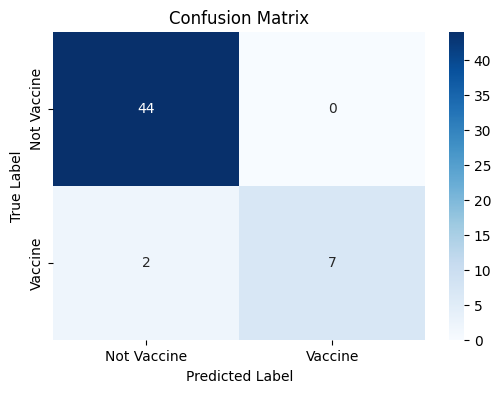

In [12]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Vaccine", "Vaccine"], yticklabels=["Not Vaccine", "Vaccine"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
